In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'figure_1',
        root = '..'
    )

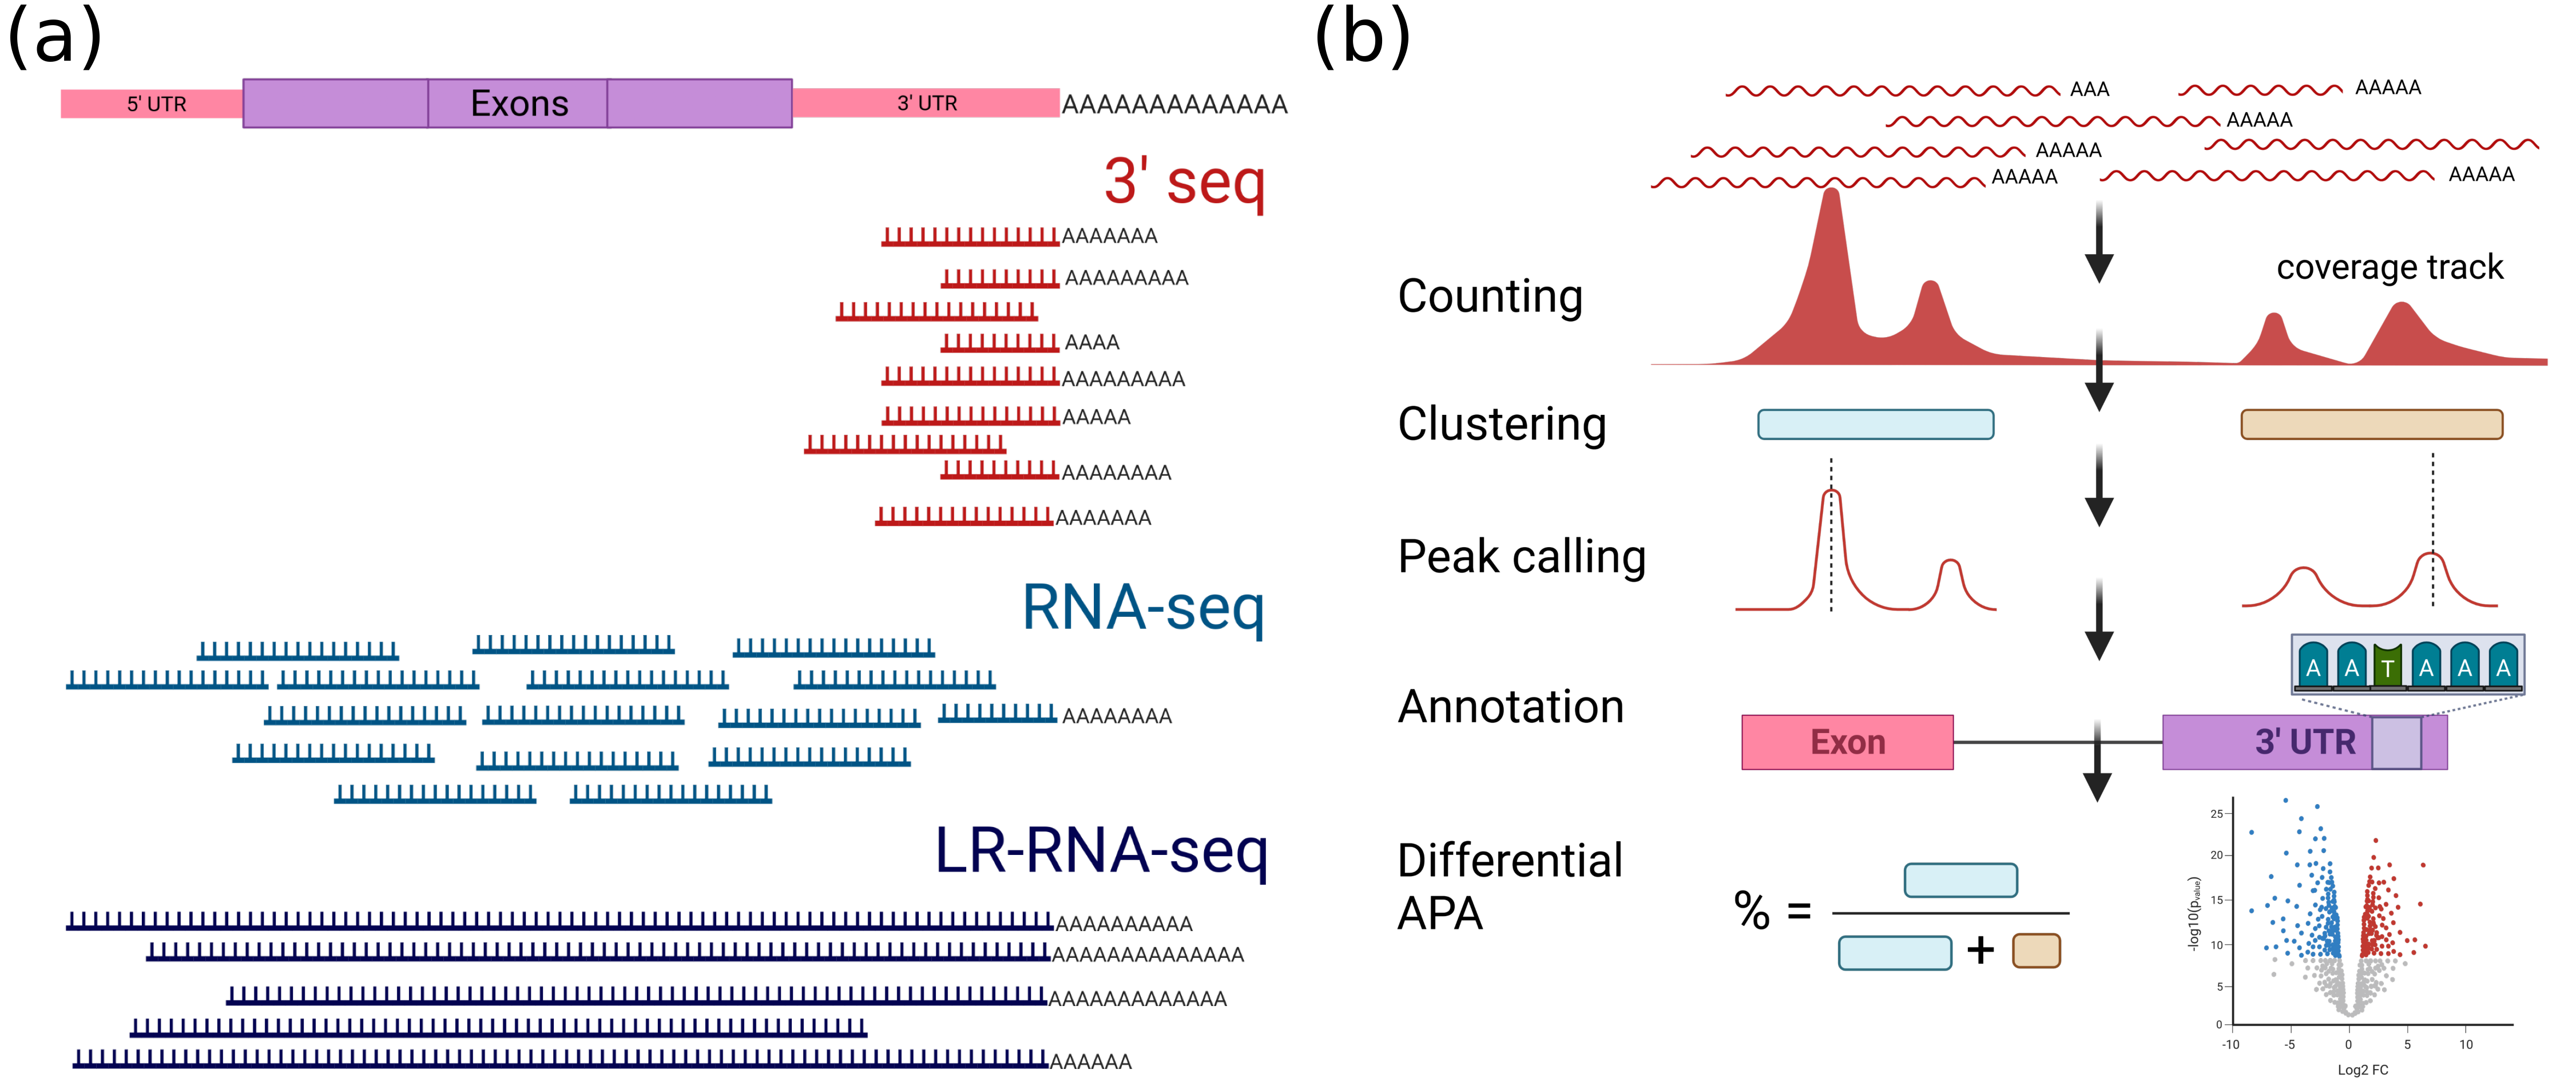

In [2]:
import patchworklib as pw
import seaborn as sns 
import matplotlib.pyplot as plt


ax1 = pw.Brick("ax12", figsize=(30, 30))
ax1.imshow(plt.imread(snakemake.input['data_source']))
ax1.axis('off')
ax1.set_title('(a)', fontsize=128)
ax1.title.set_x(0)

ax2 = pw.Brick("ax11", figsize=(30, 30))
ax2.imshow(plt.imread(snakemake.input['method']))
ax2.axis('off')
ax2.set_title('(b)', fontsize=128)
ax2.title.set_x(0)

ax = ax1 | ax2

_ = ax.savefig(snakemake.output['fig'].replace('.png', '_low.png'), dpi=25)
_ = ax.savefig(snakemake.output['fig'])